In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')


# Setting matplotlib defaults 
plt.style.use('seaborn-whitegrid')
plt.rc('figure' , autolayout = True)
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'small',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10
 
  )

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
df = reduce_mem_usage(pd.read_csv("/kaggle/input/widsdatathon2023/train_data.csv", index_col = "index"))
df_test = reduce_mem_usage(pd.read_csv("/kaggle/input/widsdatathon2023/test_data.csv", index_col = "index"))

Mem. usage decreased to 353.67 Mb (49.8% reduction)
Mem. usage decreased to 29.60 Mb (49.5% reduction)


In [5]:
target = "contest-tmp2m-14d__tmp2m"

In [6]:
df["startdate"] = pd.to_datetime(df["startdate"])
df_test["startdate"] = pd.to_datetime(df_test["startdate"])

# Shift date

In [ ]:
# def reduce_date(df, column, days):
#     shifted_values = pd.to_datetime(df[column]) - pd.DateOffset(days=days)
#     return shifted_values

# df["startdate"] = reduce_date(df, "startdate", -28)

---

In [7]:
scale = 14

df.loc[:,'lat']=round(df.lat,scale)
df.loc[:,'lon']=round(df.lon,scale)

df_test.loc[:,'lat']=round(df_test.lat,scale)
df_test.loc[:,'lon']=round(df_test.lon,scale)

# Concatenate train and test data
all_df = pd.concat([df, df_test], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
df = all_df.iloc[:len(df)]
df_test = all_df.iloc[len(df):]

print('Locations in train that are not in test')
print([c for c in df.loc_group.unique() if c not in df_test.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in df_test.loc_group.unique() if c not in df.loc_group.unique()])

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc_group
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,2014-09-01,237.000000,29.02,31.639999,29.57,30.73,29.709999,31.52,...,-37.209999,8.320000,9.560000,-2.03,48.130001,28.090000,-13.500000,11.900000,4.580000,0
1,0.0,0.833333,2014-09-02,228.899994,29.02,31.639999,29.57,30.73,29.709999,31.52,...,-36.570000,8.770000,21.170000,4.44,48.599998,27.410000,-23.770000,15.440000,3.420000,0
2,0.0,0.833333,2014-09-03,220.690002,29.02,31.639999,29.57,30.73,29.709999,31.52,...,-34.160000,6.990000,32.160000,5.01,48.529999,19.209999,-33.160000,15.110000,4.820000,0
3,0.0,0.833333,2014-09-04,225.279999,29.02,31.639999,29.57,30.73,29.709999,31.52,...,-31.040001,6.170000,39.660000,-1.41,50.590000,8.290000,-37.220001,18.240000,9.740000,0
4,0.0,0.833333,2014-09-05,237.240005,29.02,31.639999,29.57,30.73,29.709999,31.52,...,-31.799999,7.470000,38.619999,-5.21,54.730000,-2.580000,-42.299999,21.910000,10.950000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407083,1.0,0.866667,2022-12-27,62.720001,4.60,8.710000,6.05,10.08,6.390000,8.42,...,-8.490000,32.389999,38.820000,7.42,11.750000,-23.620001,-0.240000,-5.940000,51.230000,513
407084,1.0,0.866667,2022-12-28,73.410004,4.60,8.710000,6.05,10.08,6.390000,8.42,...,0.830000,26.230000,37.639999,13.01,17.840000,-22.049999,-3.030000,1.310000,51.450001,513
407085,1.0,0.866667,2022-12-29,70.000000,4.60,8.710000,6.05,10.08,6.390000,8.42,...,10.900000,21.059999,36.529999,14.15,23.120001,-25.600000,-5.880000,9.320000,45.320000,513


514 unique locations
Locations in train that are not in test
[]
Locations in test that are not in train
[]


In [8]:
missing_cols = [i for i in df.columns if (df[i].isnull().sum() > 1)]
display(missing_cols)

['nmme0-tmp2m-34w__ccsm30',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-prate-34w__ccsm3',
 'nmme0-prate-56w__ccsm30',
 'nmme0-prate-34w__ccsm30',
 'nmme-prate-56w__ccsm3',
 'nmme-tmp2m-34w__ccsm3',
 'ccsm30']

In [9]:
# Fill missing values
for i in missing_cols:
    df[i] = df[i].fillna(df[i].mean())

In [10]:
display(df.isnull().sum().max())

0

In [11]:
df["dayofyear"] = df["startdate"].apply(lambda i: i.day_of_year)
df["month"] = df["startdate"].apply(lambda i: i.month)
df["year"] = df["startdate"].apply(lambda i: i.year)
df["quarter"] = df["startdate"].apply(lambda i: i.quarter)
df["week"] = df["startdate"].apply(lambda i: i.weekofyear)

df_test["dayofyear"] = df_test["startdate"].apply(lambda i: i.day_of_year)
df_test["month"] = df_test["startdate"].apply(lambda i: i.month)
df_test["year"] = df_test["startdate"].apply(lambda i: i.year)
df_test["quarter"] = df_test["startdate"].apply(lambda i: i.quarter)
df_test["week"] = df_test["startdate"].apply(lambda i: i.weekofyear)

In [12]:
df['condensation_14d'] = df['contest-pevpr-sfc-gauss-14d__pevpr']*df['contest-rhum-sig995-14d__rhum']/100 
df_test['condensation_14d'] = df_test['contest-pevpr-sfc-gauss-14d__pevpr']*df_test['contest-rhum-sig995-14d__rhum']/100  

In [13]:
cols = df.columns
display(cols)
display(len(cols))

Index(['lat', 'lon', 'startdate', 'contest-pevpr-sfc-gauss-14d__pevpr',
       'nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__cancm40',
       'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40',
       'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0',
       ...
       'wind-vwnd-925-2010-18', 'wind-vwnd-925-2010-19',
       'wind-vwnd-925-2010-20', 'loc_group', 'dayofyear', 'month', 'year',
       'quarter', 'week', 'condensation_14d'],
      dtype='object', length=252)

252

In [14]:
wind_cols = [i for i in cols if (i.startswith("wind"))]
contest_cols = [i for i in cols if (i.startswith("contest") and (target not in i))]
nmme0_34w_cols = [i for i in cols if (i.startswith("nmme") and ("34w" in i) and ("nmme0" in i))]
nmme0_56w_cols = [i for i in cols if (i.startswith("nmme") and ("56w" in i) and ("nmme0" in i))] #??
nmme_34w_cols = [i for i in cols if (i.startswith("nmme") and ("34w" in i) and ("nmme0" not in i))]
nmme_56w_cols = [i for i in cols if (i.startswith("nmme") and ("56w" in i) and ("nmme0" not in i))]
mei_cols = [i for i in cols if (i.startswith("mei"))]
mjo1d_cols = [i for i in cols if (i.startswith("mjo1d"))]
elevation_cols = [i for i in cols if (i.startswith("elevation"))]
climateregions_cols = [i for i in cols if (i.startswith("climateregions"))]
sst_cols = [i for i in cols if (i.startswith("sst"))]
icec_cols = [i for i in cols if (i.startswith("icec"))]
forecast_model_cols = ["cancm30", "cancm40", "ccsm30", "ccsm40", "cfsv20", "gfdlflora0", "gfdlflorb0", "gfdl0", "nasa0", "nmme0mean"]

mean_cols = [i for i in cols if ("mean" in i)]

total_len = len(wind_cols) + len(contest_cols) + len(nmme0_34w_cols) + len(nmme0_56w_cols) + len(nmme_34w_cols) + len(nmme_56w_cols) + len(mei_cols) + len(mjo1d_cols) + len(elevation_cols) + len(climateregions_cols) + len(sst_cols) + len(icec_cols) + len(forecast_model_cols)
display(total_len)
display(len(cols))

241

252

In [ ]:
# train_cols = ["condensation_14d", "mei__mei", "mei__meirank", "mei__nip", "nmme0mean", "mjo1d__phase", "mjo1d__amplitude", "elevation__elevation", "month", "loc_group", "dayofyear", "week", "quarter", "lat", "lon"]
# for i in contest_cols:
#     if i not in train_cols:
#         train_cols.append(i)
        
# for i in sst_cols:
#     if i not in train_cols:
#         train_cols.append(i)
        
# for i in icec_cols:
#     if i not in train_cols:
#         train_cols.append(i)

# if target in train_cols:
#     train_cols.remove(target)


# Feature Engineering

## Contest cols

In [15]:
from sklearn.linear_model import LinearRegression

linear_contest = LinearRegression()
linear_contest.fit(df[contest_cols], df[target])

LinearRegression()

In [16]:
df["linear_contest"] = linear_contest.predict(df[contest_cols])
df_test["linear_contest"] = linear_contest.predict(df_test[contest_cols])

## Wind_vwnd cols

In [18]:
wind_vwnd_cols = [i for i in cols if ("wind-vwnd" in i)]
# display(wind_vwnd_cols)

In [19]:
linear_wind_vwnd = LinearRegression()
linear_wind_vwnd.fit(df[wind_vwnd_cols], df[target])

LinearRegression()

In [20]:
df["linear_wind_vwnd"] = linear_wind_vwnd.predict(df[wind_vwnd_cols])
df_test["linear_wind_vwnd"] = linear_wind_vwnd.predict(df_test[wind_vwnd_cols])

## Wind_uwnd cols

In [21]:
wind_uwnd_cols = [i for i in cols if ("wind-uwnd" in i)]
# display(wind_uwnd_cols)

In [22]:
linear_wind_uwnd = LinearRegression()
linear_wind_uwnd.fit(df[wind_uwnd_cols], df[target])

LinearRegression()

In [23]:
df["linear_wind_uwnd"] = linear_wind_uwnd.predict(df[wind_uwnd_cols])
df_test["linear_wind_uwnd"] = linear_wind_uwnd.predict(df_test[wind_uwnd_cols])

## Wind_hgt cols

In [24]:
wind_hgt_cols = [i for i in cols if ("wind-hgt" in i)]
# display(wind_hgt_cols)

In [25]:
linear_wind_hgt = LinearRegression()
linear_wind_hgt.fit(df[wind_hgt_cols], df[target])

LinearRegression()

In [26]:
df["linear_wind_hgt"] = linear_wind_hgt.predict(df[wind_hgt_cols])
df_test["linear_wind_hgt"] = linear_wind_hgt.predict(df_test[wind_hgt_cols])

## Wind_cols

In [27]:
linear_wind = LinearRegression()
linear_wind.fit(df[wind_cols], df[target])

LinearRegression()

In [28]:
df["linear_wind"] = linear_wind.predict(df[wind_cols])
df_test["linear_wind"] = linear_wind.predict(df_test[wind_cols])

## Sst_cols

In [29]:
linear_sst = LinearRegression()
linear_sst.fit(df[sst_cols], df[target])

LinearRegression()

In [30]:
df["linear_sst"] = linear_sst.predict(df[sst_cols])
df_test["linear_sst"] = linear_sst.predict(df_test[sst_cols])

## Icec_cols

In [31]:
linear_icec = LinearRegression()
linear_icec.fit(df[icec_cols], df[target])

LinearRegression()

In [32]:
df["linear_icec"] = linear_icec.predict(df[icec_cols])
df_test["linear_icec"] = linear_icec.predict(df_test[icec_cols])

## Coordinate features

In [33]:
df["coordinate"] = np.sqrt(df["linear_wind_uwnd"] ** 2 + df["linear_wind_vwnd"] ** 2 + df["linear_wind_hgt"] ** 2)
df_test["coordinate"] = np.sqrt(df_test["linear_wind_uwnd"] ** 2 + df_test["linear_wind_vwnd"] ** 2 + df_test["linear_wind_hgt"] ** 2)

# ---------------------------------------------

In [ ]:
# # Add columns
# add_cols = ["linear_contest", "linear_wind_vwnd", "linear_wind_uwnd", "linear_wind_hgt", "linear_wind", "linear_sst", "linear_icec", "coordinate"]
# remove_cols = [] # "quarter", "mei__nip", "contest-pres-sfc-gauss-14d__pres"]

# for i in add_cols:
#     if i not in train_cols:
#         train_cols.append(i)

# for i in remove_cols:
#     if i in train_cols:
#         train_cols.remove(i)

# Kmean clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN

def clustering_base(features, name_of_new_feature, num_of_cluster):
    cluster_data = df[features]
    kmeans = KMeans(n_clusters = num_of_cluster, random_state = 42, n_init = 10).fit(cluster_data)
    display(metrics.calinski_harabasz_score(cluster_data, kmeans.labels_))
    display(metrics.davies_bouldin_score(cluster_data, kmeans.labels_))
    df[name_of_new_feature] = kmeans.labels_
    df_test[name_of_new_feature] = kmeans.predict(df_test[features])
    return kmeans.labels_

## Temperature and precipitation

+ Temperature-related: Temperature, Sea surface temperature, potential evaporation
+ Precipitation-related: Global precipitation, U.S. precipitation, precipitable water for the entire atmosphere


Temperature and precipitation: Cold and dry, cold and wet, warm and dry, warm and wet

In [36]:
temp_and_precip = [
    "contest-pevpr-sfc-gauss-14d__pevpr",
    "contest-precip-14d__precip",
    "nmme0mean",
    'sst-2010-1',
    'sst-2010-2',
    'sst-2010-3',
    'sst-2010-4',
    'sst-2010-5',
    'sst-2010-6',
    'sst-2010-7',
    'sst-2010-8',
    'sst-2010-9',
    'sst-2010-10',
    'nmme-prate-34w__cancm3',
    'nmme-prate-34w__cancm4',
    'nmme-prate-34w__ccsm3',
    'nmme-prate-34w__ccsm4',
    'nmme-prate-34w__cfsv2',
    'nmme-prate-34w__gfdl',
    'nmme-prate-34w__gfdlflora',
    'nmme-prate-34w__gfdlflorb',
    'nmme-prate-34w__nasa',
    'nmme-prate-34w__nmmemean',
    'nmme0-prate-56w__cancm30',
    'nmme0-prate-56w__cancm40',
    'nmme0-prate-56w__ccsm30',
    'nmme0-prate-56w__ccsm40',
    'nmme0-prate-56w__cfsv20',
    'nmme0-prate-56w__gfdlflora0',
    'nmme0-prate-56w__gfdlflorb0',
    'nmme0-prate-56w__gfdl0',
    'nmme0-prate-56w__nasa0',
    'nmme0-prate-56w__nmme0mean',
    'nmme0-prate-34w__cancm30',
    'nmme0-prate-34w__cancm40',
    'nmme0-prate-34w__ccsm30',
    'nmme0-prate-34w__ccsm40',
    'nmme0-prate-34w__cfsv20',
    'nmme0-prate-34w__gfdlflora0',
    'nmme0-prate-34w__gfdlflorb0',
    'nmme0-prate-34w__gfdl0',
    'nmme0-prate-34w__nasa0',
    'nmme0-prate-34w__nmme0mean',
    'nmme-prate-56w__cancm3',
    'nmme-prate-56w__cancm4',
    'nmme-prate-56w__ccsm3',
    'nmme-prate-56w__ccsm4',
    'nmme-prate-56w__cfsv2',
    'nmme-prate-56w__gfdl',
    'nmme-prate-56w__gfdlflora',
    'nmme-prate-56w__gfdlflorb',
    'nmme-prate-56w__nasa',
    'nmme-prate-56w__nmmemean'
]

In [42]:
f_cl = clustering_base(temp_and_precip, "temp_and_precip", 9)

184735.593628943

1.190588011748134

([], [])

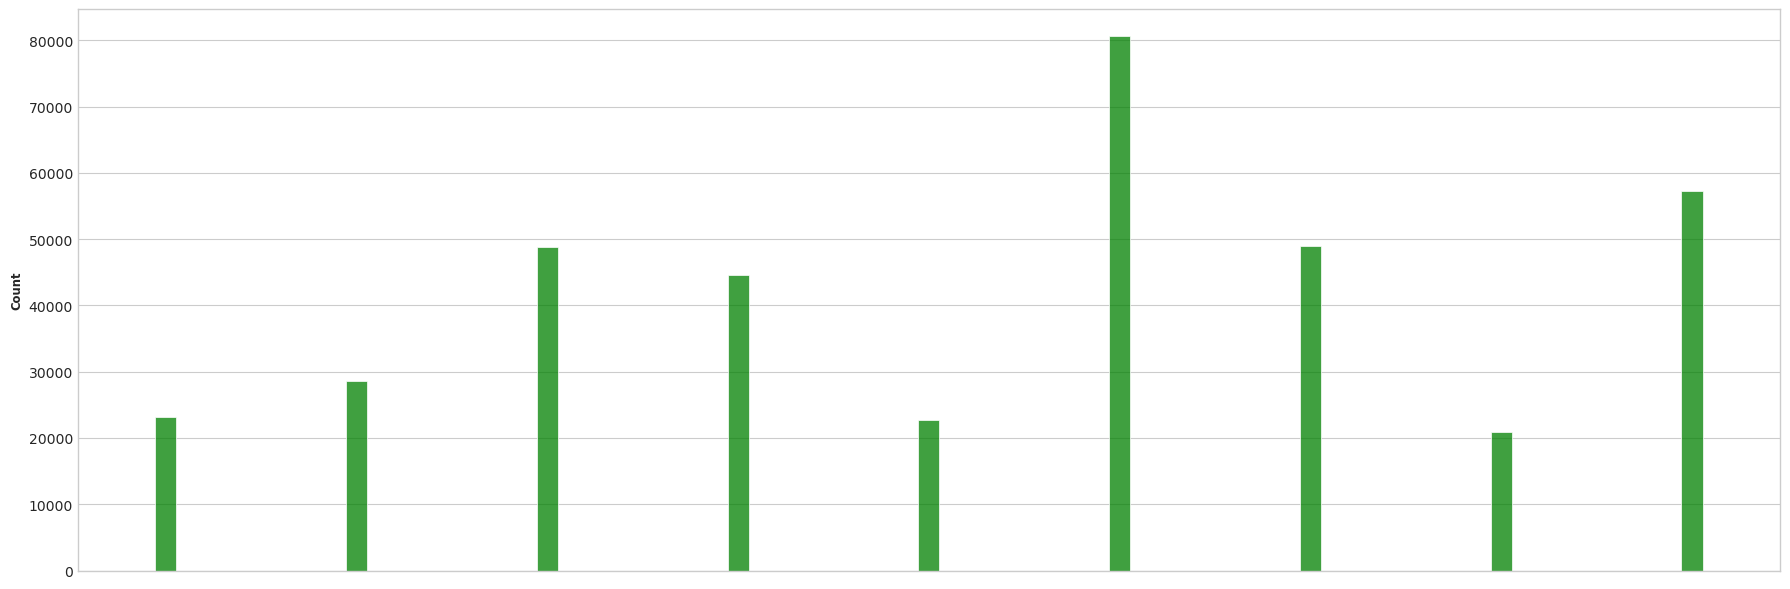

In [43]:
plt.figure(figsize = (18, 6))
sns.histplot(f_cl, color = "green")
plt.xticks([])

----

## Atmospheric circulation

+ Atmospheric circulation-related: Madden-Julian oscillation (MJO), zonal wind, longitudinal wind, Geopotential height wind
+ Atmospheric circulation: Calm, windy, stormy

In [44]:
atmospheric_circulation = [
    'mjo1d__phase',
    'mjo1d__amplitude',
    'contest-wind-h10-14d__wind-hgt-10',
    'contest-wind-h100-14d__wind-hgt-100',
    'contest-wind-vwnd-925-14d__wind-vwnd-925',
    'contest-wind-uwnd-250-14d__wind-uwnd-250',
    'contest-wind-vwnd-250-14d__wind-vwnd-250',
    'contest-wind-h850-14d__wind-hgt-850',
    'contest-wind-uwnd-925-14d__wind-uwnd-925',
    'contest-wind-h500-14d__wind-hgt-500',
    'wind-vwnd-250-2010-1',
    'wind-vwnd-250-2010-2',
    'wind-vwnd-250-2010-3',
    'wind-vwnd-250-2010-4',
    'wind-vwnd-250-2010-5',
    'wind-vwnd-250-2010-6',
    'wind-vwnd-250-2010-7',
    'wind-vwnd-250-2010-8',
    'wind-vwnd-250-2010-9',
    'wind-vwnd-250-2010-10',
    'wind-vwnd-250-2010-11',
    'wind-vwnd-250-2010-12',
    'wind-vwnd-250-2010-13',
    'wind-vwnd-250-2010-14',
    'wind-vwnd-250-2010-15',
    'wind-vwnd-250-2010-16',
    'wind-vwnd-250-2010-17',
    'wind-vwnd-250-2010-18',
    'wind-vwnd-250-2010-19',
    'wind-vwnd-250-2010-20',
    'wind-uwnd-250-2010-1',
    'wind-uwnd-250-2010-2',
    'wind-uwnd-250-2010-3',
    'wind-uwnd-250-2010-4',
    'wind-uwnd-250-2010-5',
    'wind-uwnd-250-2010-6',
    'wind-uwnd-250-2010-7',
    'wind-uwnd-250-2010-8',
    'wind-uwnd-250-2010-9',
    'wind-uwnd-250-2010-10',
    'wind-uwnd-250-2010-11',
    'wind-uwnd-250-2010-12',
    'wind-uwnd-250-2010-13',
    'wind-uwnd-250-2010-14',
    'wind-uwnd-250-2010-15',
    'wind-uwnd-250-2010-16',
    'wind-uwnd-250-2010-17',
    'wind-uwnd-250-2010-18',
    'wind-uwnd-250-2010-19',
    'wind-uwnd-250-2010-20',
    'wind-hgt-850-2010-1',
    'wind-hgt-850-2010-2',
    'wind-hgt-850-2010-3',
    'wind-hgt-850-2010-4',
    'wind-hgt-850-2010-5',
    'wind-hgt-850-2010-6',
    'wind-hgt-850-2010-7',
    'wind-hgt-850-2010-8',
    'wind-hgt-850-2010-9',
    'wind-hgt-850-2010-10',
    'wind-hgt-500-2010-1',
    'wind-hgt-500-2010-2',
    'wind-hgt-500-2010-3',
    'wind-hgt-500-2010-4',
    'wind-hgt-500-2010-5',
    'wind-hgt-500-2010-6',
    'wind-hgt-500-2010-7',
    'wind-hgt-500-2010-8',
    'wind-hgt-500-2010-9',
    'wind-hgt-500-2010-10',
    'wind-uwnd-925-2010-1',
    'wind-uwnd-925-2010-2',
    'wind-uwnd-925-2010-3',
    'wind-uwnd-925-2010-4',
    'wind-uwnd-925-2010-5',
    'wind-uwnd-925-2010-6',
    'wind-uwnd-925-2010-7',
    'wind-uwnd-925-2010-8',
    'wind-uwnd-925-2010-9',
    'wind-uwnd-925-2010-10',
    'wind-uwnd-925-2010-11',
    'wind-uwnd-925-2010-12',
    'wind-uwnd-925-2010-13',
    'wind-uwnd-925-2010-14',
    'wind-uwnd-925-2010-15',
    'wind-uwnd-925-2010-16',
    'wind-uwnd-925-2010-17',
    'wind-uwnd-925-2010-18',
    'wind-uwnd-925-2010-19',
    'wind-uwnd-925-2010-20',
    'wind-hgt-10-2010-1',
    'wind-hgt-10-2010-2',
    'wind-hgt-10-2010-3',
    'wind-hgt-10-2010-4',
    'wind-hgt-10-2010-5',
    'wind-hgt-10-2010-6',
    'wind-hgt-10-2010-7',
    'wind-hgt-10-2010-8',
    'wind-hgt-10-2010-9',
    'wind-hgt-10-2010-10',
    'wind-hgt-100-2010-1',
    'wind-hgt-100-2010-2',
    'wind-hgt-100-2010-3',
    'wind-hgt-100-2010-4',
    'wind-hgt-100-2010-5',
    'wind-hgt-100-2010-6',
    'wind-hgt-100-2010-7',
    'wind-hgt-100-2010-8',
    'wind-hgt-100-2010-9',
    'wind-hgt-100-2010-10',
    'wind-vwnd-925-2010-1',
    'wind-vwnd-925-2010-2',
    'wind-vwnd-925-2010-3',
    'wind-vwnd-925-2010-4',
    'wind-vwnd-925-2010-5',
    'wind-vwnd-925-2010-6',
    'wind-vwnd-925-2010-7',
    'wind-vwnd-925-2010-8',
    'wind-vwnd-925-2010-9',
    'wind-vwnd-925-2010-10',
    'wind-vwnd-925-2010-11',
    'wind-vwnd-925-2010-12',
    'wind-vwnd-925-2010-13',
    'wind-vwnd-925-2010-14',
    'wind-vwnd-925-2010-15',
    'wind-vwnd-925-2010-16',
    'wind-vwnd-925-2010-17',
    'wind-vwnd-925-2010-18',
    'wind-vwnd-925-2010-19',
    'wind-vwnd-925-2010-20'
]

In [45]:
f_cl = clustering_base(atmospheric_circulation, "atmospheric_circulation", 3)

1091921.4638797783

0.7201552315537331

([], [])

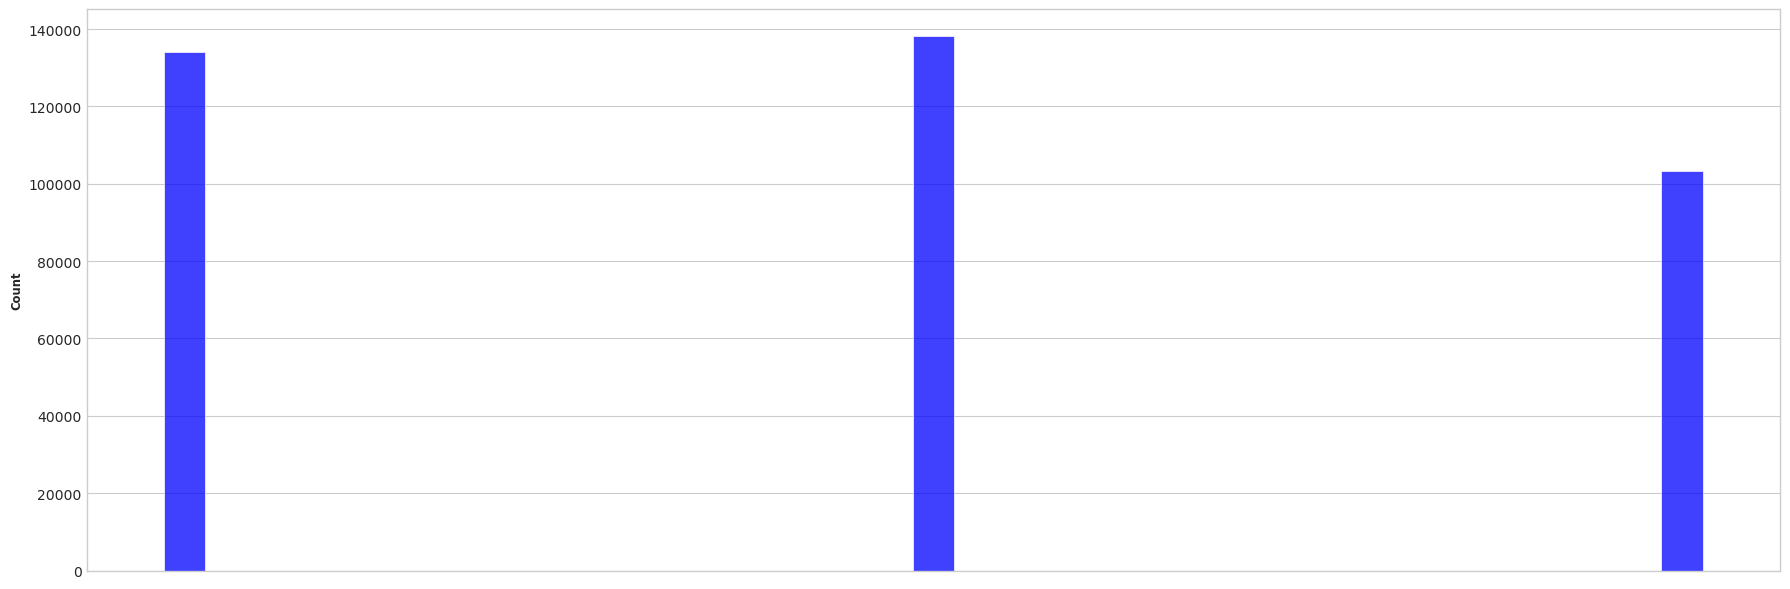

In [46]:
plt.figure(figsize = (18, 6))
sns.histplot(f_cl, color = "blue")
plt.xticks([])

---

## Humidity

+ Humidity: Low humidity, moderate humidity, high humidity

<AxesSubplot:xlabel='contest-rhum-sig995-14d__rhum', ylabel='Density'>

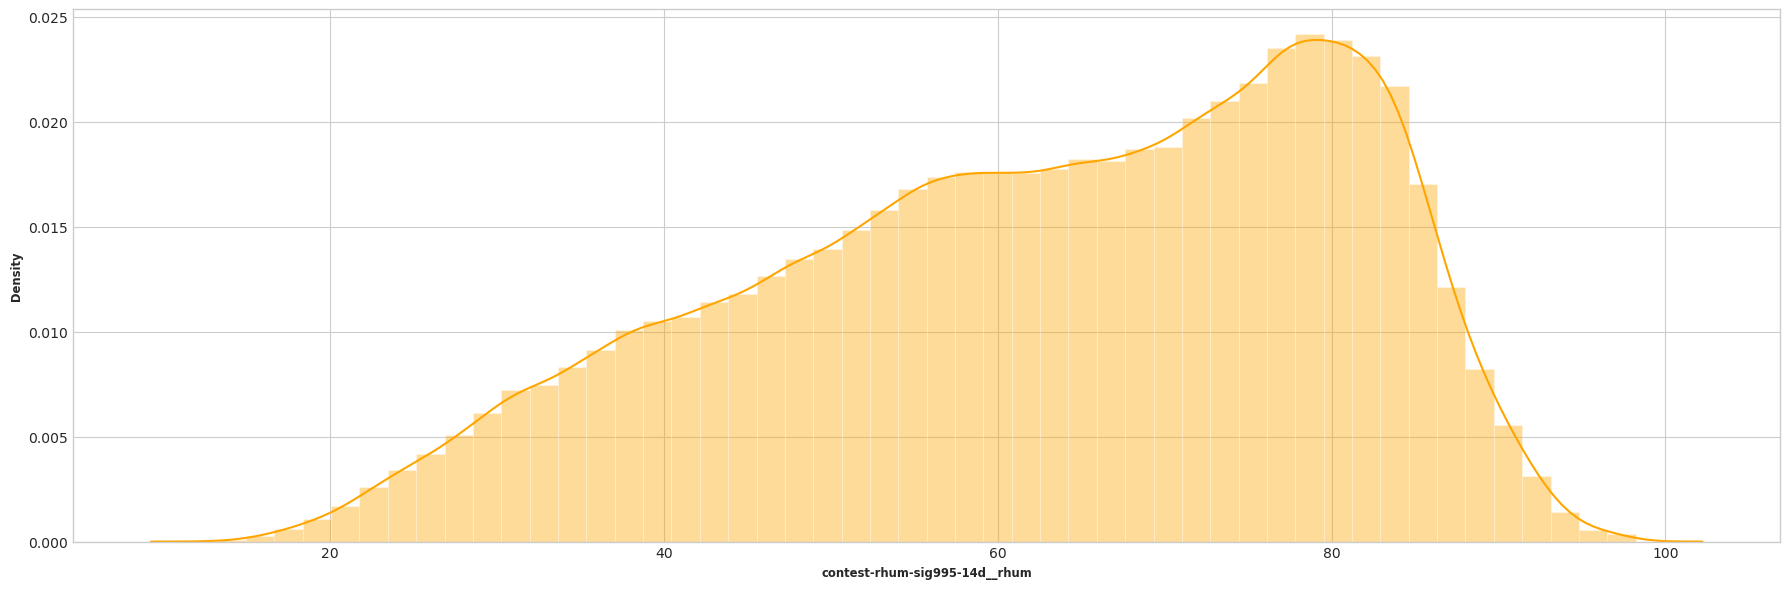

In [47]:
plt.figure(figsize = (18, 6))
sns.distplot(df["contest-rhum-sig995-14d__rhum"], color = "orange")

In [48]:
bins = [0, 40, 91, 100]
labels = ['Low', 'Moderate', 'High']
df['Humidity_bin'] = pd.cut(df['contest-rhum-sig995-14d__rhum'], bins=bins, labels=labels)

In [49]:
df_test['Humidity_bin'] = pd.cut(df_test['contest-rhum-sig995-14d__rhum'], bins=bins, labels=labels)

---

## Pressure

+ Pressure-related: Sea level pressure, Pressure
+ Pressure: High pressure, low pressure

In [ ]:
pressure = [
    "contest-slp-14d__slp",
    "contest-pres-sfc-gauss-14d__pres"
]

In [ ]:
display(df[pressure].head())

In [ ]:
f_cl = clustering_base(pressure, "pressure", 2)

In [ ]:
plt.figure(figsize = (18, 6))
sns.histplot(f_cl, color = "yellow")
plt.xticks([])

In [ ]:
plt.figure(figsize = (20, 20))
sns.scatterplot(df_test, x = "contest-slp-14d__slp", y = "contest-pres-sfc-gauss-14d__pres", hue = "pressure")

---

## Sea ice and ENSO

+ Sea ice and ENSO-related: Sea ice concentration, Multivariate ENSO index (MEI)
+ Sea ice and ENSO: El Niño, La Niña, neutral

In [50]:
sea_ice_and_ENSO = [
    'mei__mei', 
    'mei__meirank', 
    'mei__nip',
    'icec-2010-1',
    'icec-2010-2',
    'icec-2010-3',
    'icec-2010-4',
    'icec-2010-5',
    'icec-2010-6',
    'icec-2010-7',
    'icec-2010-8',
    'icec-2010-9',
    'icec-2010-10'
]

In [51]:
f_cl = clustering_base(sea_ice_and_ENSO, "sea_ice_and_ENSO", 3)

698684.27914774

0.6916753549873279

([], [])

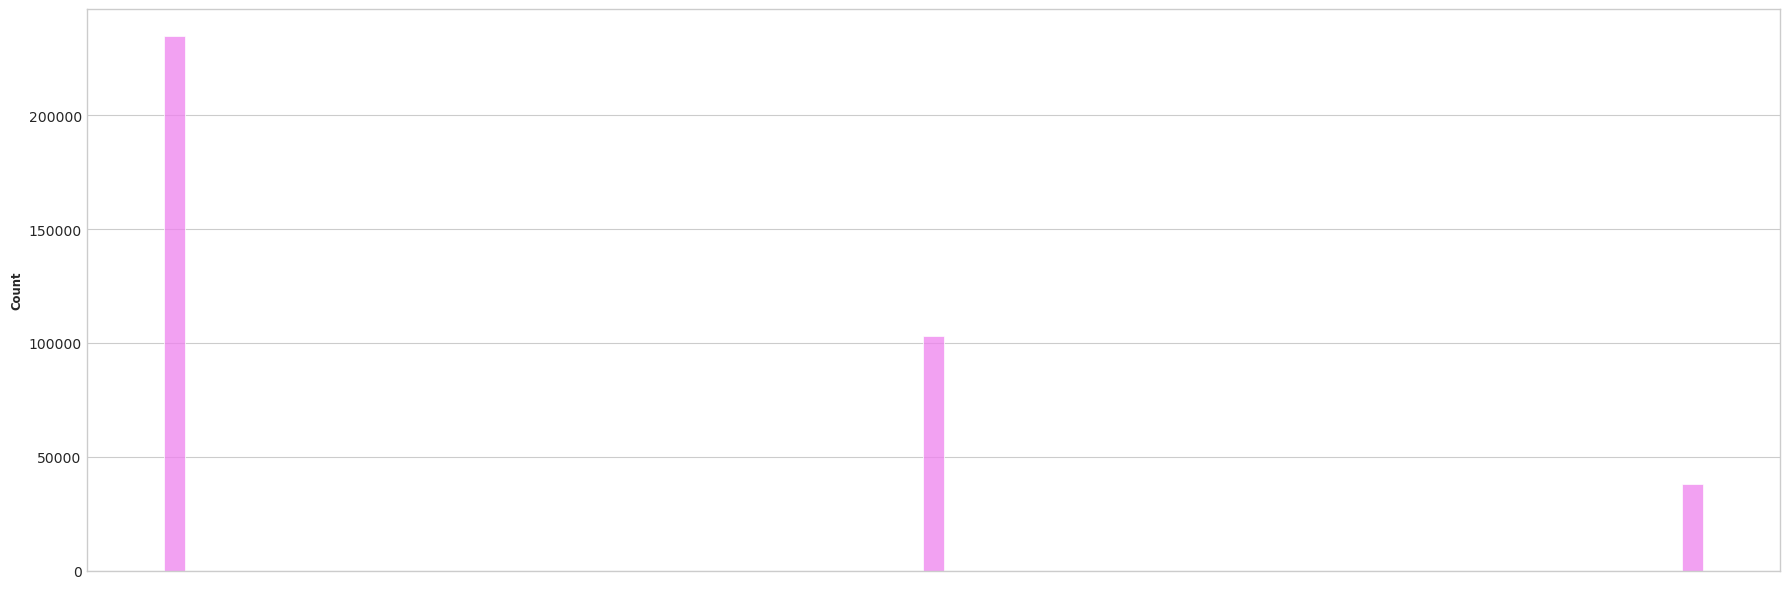

In [52]:
plt.figure(figsize = (18, 6))
sns.histplot(f_cl, color = "violet")
plt.xticks([])

---

## Topography

+ Topography-related: Elevation
+ Topography: Mountain, valley, flat

<AxesSubplot:xlabel='elevation__elevation', ylabel='Density'>

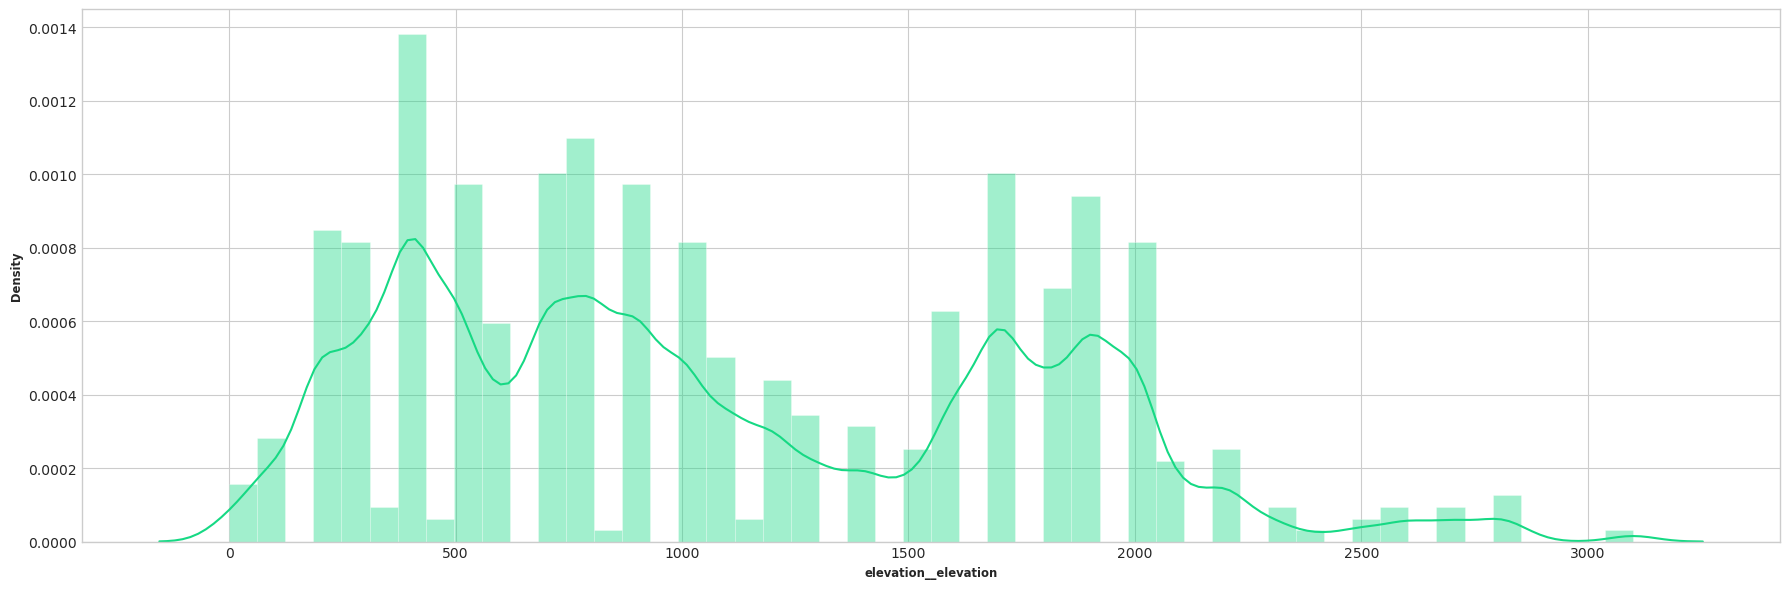

In [53]:
plt.figure(figsize = (18, 6))
sns.distplot(df["elevation__elevation"], color = "#16d984")

In [54]:
# define the bin edges
bins = [-1, 500, 1000, 3100]

# define the bin labels
labels = ['Valley', 'Flat', 'Mountain']

df['Topography_bin'] = pd.cut(df['elevation__elevation'], bins=bins, labels=labels)
df_test['Topography_bin'] = pd.cut(df_test['elevation__elevation'], bins=bins, labels=labels)

---

## Weather conditions

+ Cold, dry, and windy
+ Warm, humid, and calm
+ Stormy with high humidity

In [56]:
weather_types = [
 'condensation_14d',
 'mei__mei',
 'mei__meirank',
 'mei__nip',
 'nmme0mean',
 'mjo1d__phase',
 'mjo1d__amplitude',
 'elevation__elevation',
 'month',
 'loc_group',
 'dayofyear',
 'week',
 'quarter',
 'lat',
 'lon',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'contest-wind-h10-14d__wind-hgt-10',
 'contest-rhum-sig995-14d__rhum',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-slp-14d__slp',
 'contest-wind-vwnd-925-14d__wind-vwnd-925',
 'contest-pres-sfc-gauss-14d__pres',
 'contest-wind-uwnd-250-14d__wind-uwnd-250',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-wind-vwnd-250-14d__wind-vwnd-250',
 'contest-precip-14d__precip',
 'contest-wind-h850-14d__wind-hgt-850',
 'contest-wind-uwnd-925-14d__wind-uwnd-925',
 'contest-wind-h500-14d__wind-hgt-500',
 'sst-2010-10',
 'icec-2010-10',
 'linear_contest',
 'linear_wind_vwnd',
 'linear_wind_uwnd',
 'linear_wind_hgt',
 'linear_wind',
 'linear_sst',
 'linear_icec',
 'coordinate'
]

In [57]:
f_cl = clustering_base(weather_types, "weather_types", 6)

1603974.503912425

0.6693116366698817

([], [])

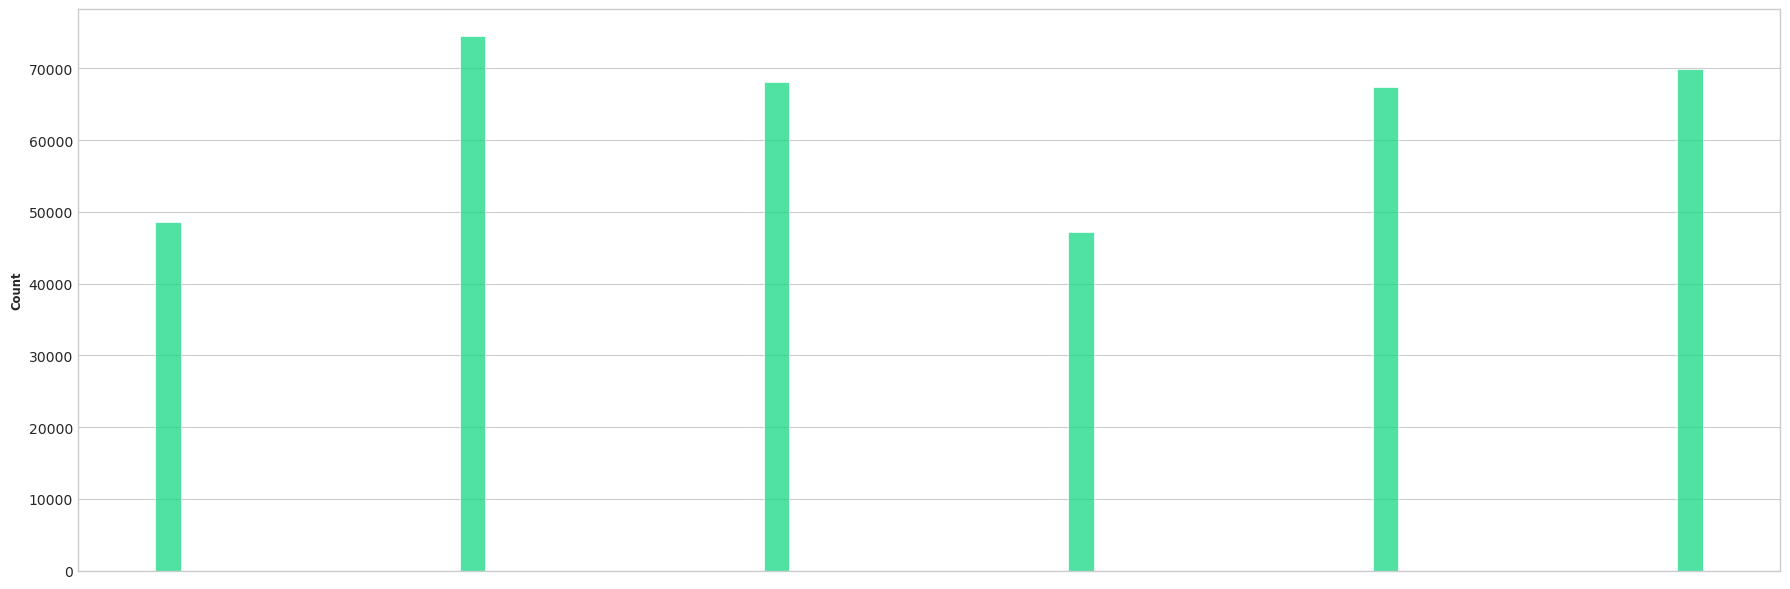

In [58]:
plt.figure(figsize = (18, 6))
sns.histplot(f_cl, color = "#16d984")
plt.xticks([])

------------

In [ ]:
# import numpy as np
# import scipy as sp

# def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
#     # Result is noise by default
#     y_new = np.ones(shape=len(X_new), dtype=int)*-1 

#     # Iterate all input samples for a label
#     for j, x_new in enumerate(X_new):
#         # Find a core sample closer than EPS
#         for i, x_core in enumerate(dbscan_model.components_): 
#             if metric(x_new, x_core) < dbscan_model.eps:
#                 # Assign label of x_core to x_new
#                 y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
#                 break

#     return y_new

In [59]:
display(df.head())

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,linear_wind,linear_sst,linear_icec,coordinate,temp_and_precip,atmospheric_circulation,Humidity_bin,sea_ice_and_ENSO,Topography_bin,weather_types
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,2014-09-01,237.000000,29.02,31.639999,29.57,30.73,29.709999,31.52,...,18.229677,19.272854,18.455507,39.799152,6,1,Moderate,1,Valley,0
1,0.0,0.833333,2014-09-02,228.899994,29.02,31.639999,29.57,30.73,29.709999,31.52,...,18.109735,19.181965,18.455507,39.176861,6,1,Moderate,1,Valley,0
2,0.0,0.833333,2014-09-03,220.690002,29.02,31.639999,29.57,30.73,29.709999,31.52,...,18.002226,19.059303,18.455507,38.668167,6,1,Moderate,1,Valley,0
3,0.0,0.833333,2014-09-04,225.279999,29.02,31.639999,29.57,30.73,29.709999,31.52,...,17.944975,18.901474,18.455507,38.266804,6,1,Moderate,1,Valley,0
4,0.0,0.833333,2014-09-05,237.240005,29.02,31.639999,29.57,30.73,29.709999,31.52,...,17.926754,18.713446,18.455507,37.878628,6,1,Moderate,1,Valley,0


# Training

### Encode climateregions

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df["climateregions__climateregion"])

LabelEncoder()

In [61]:
df["climateregions__climateregion"] = encoder.transform(df["climateregions__climateregion"])
df_test["climateregions__climateregion"] = encoder.transform(df_test["climateregions__climateregion"])

---

In [66]:
train_cols = [
    'coordinate', 
    'temp_and_precip',
    'atmospheric_circulation', 
    'Humidity_bin', 
    'sea_ice_and_ENSO', 
    'Topography_bin', 
    'weather_types',
    "loc_group",
    "lat",
    "lon",
    "climateregions__climateregion",
    "elevation__elevation",
    "nmme0-prate-34w__nmme0mean",
    "nmme0mean",
    'linear_contest',
#     'linear_icec',
    'contest-pevpr-sfc-gauss-14d__pevpr',
    'contest-wind-h10-14d__wind-hgt-10',
    'contest-rhum-sig995-14d__rhum',
    'contest-wind-h100-14d__wind-hgt-100',
    'contest-slp-14d__slp',
    'contest-wind-vwnd-925-14d__wind-vwnd-925',
    'contest-pres-sfc-gauss-14d__pres',
    'contest-wind-uwnd-250-14d__wind-uwnd-250',
    'contest-prwtr-eatm-14d__prwtr',
    'contest-wind-vwnd-250-14d__wind-vwnd-250',
    'contest-precip-14d__precip',
    'contest-wind-h850-14d__wind-hgt-850',
    'contest-wind-uwnd-925-14d__wind-uwnd-925',
    'contest-wind-h500-14d__wind-hgt-500',
    "condensation_14d",
    "dayofyear",
    "week",
    "quarter",
#     "month",
    "mei__mei",
    "mjo1d__phase",
    "mjo1d__amplitude",
    'sst-2010-1',
    'sst-2010-2',
    'sst-2010-3',
    'sst-2010-4',
    'sst-2010-5',
    'sst-2010-6',
    'sst-2010-7',
    'sst-2010-8',
    'sst-2010-9',
    'sst-2010-10',
    'icec-2010-1',
    'icec-2010-2',
    'icec-2010-3',
    'icec-2010-4',
    'icec-2010-5',
    'icec-2010-6',
    'icec-2010-7',
    'icec-2010-8',
    'icec-2010-9',
    'icec-2010-10',
]

In [67]:
display(df_test[train_cols].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 375734 to 407087
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   coordinate                                31354 non-null  float32 
 1   temp_and_precip                           31354 non-null  int32   
 2   atmospheric_circulation                   31354 non-null  int32   
 3   Humidity_bin                              31354 non-null  category
 4   sea_ice_and_ENSO                          31354 non-null  int32   
 5   Topography_bin                            31354 non-null  category
 6   weather_types                             31354 non-null  int32   
 7   loc_group                                 31354 non-null  int64   
 8   lat                                       31354 non-null  float32 
 9   lon                                       31354 non-null  float32 
 10  climateregions__

None

In [68]:
X = df[train_cols]
y = df[target]
display(X.shape)

(375734, 56)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape)
display(X_valid.shape)

(263013, 56)

(112721, 56)

In [119]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from catboost import CatBoostRegressor
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    "max_depth": 32,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 10000
}

cat_boost_hyper_params = {
    "verbose": 200,
    "loss_function": "RMSE",
    "iterations": 200,
    "early_stopping_rounds": 1000,
    "eval_metric": "RMSE",
#     "learning_rate": 0.005,
    "l2_leaf_reg": 0.02,
    "max_leaves": 64,
    "rsm": 0.8,
    "min_data_in_leaf": 1,
    "max_bin": 512
}

# model = CatBoostRegressor(**cat_boost_hyper_params)
# model.fit(X_train, y_train, cat_features=["quarter", "loc_group", 'temp_and_precip','atmospheric_circulation', 'weather_types', "climateregions__climateregion"])

gbm = LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='l1',
        verbose =  500,
        early_stopping_rounds=1000)

# model = LassoCV()
# model.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[500]	valid_0's l1: 1.16162	valid_0's l2: 2.17152
[1000]	valid_0's l1: 0.647024	valid_0's l2: 0.691629
[1500]	valid_0's l1: 0.487325	valid_0's l2: 0.392112
[2000]	valid_0's l1: 0.420519	valid_0's l2: 0.290745
[2500]	valid_0's l1: 0.382361	valid_0's l2: 0.239571
[3000]	valid_0's l1: 0.35445	valid_0's l2: 0.20578
[3500]	valid_0's l1: 0.332995	valid_0's l2: 0.181353
[4000]	valid_0's l1: 0.316554	valid_0's l2: 0.163829
[4500]	valid_0's l1: 0.302457	valid_0's l2: 0.149718
[5000]	valid_0's l1: 0.291135	valid_0's l2: 0.138509
[5500]	valid_0's l1: 0.280571	valid_0's l2: 0.128754
[6000]	valid_0's l1: 0.271074	valid_0's l2: 0.120245
[6500]	valid_0's l

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=32,
              metric=['l1', 'l2'], num_iterations=10000, num_leaves=128,
              objective='regression', task='train')

# Linear Regression

In [ ]:
for i in icec_cols:
    if i in train_cols:
        train_cols.remove(i)
        
for i in sst_cols:
    if i in train_cols:
        train_cols.remove(i)

In [ ]:
beta_remove = ["month", "week", "loc_group", "dayofyear", "linear_wind_vwnd", "linear_wind_uwnd", "linear_wind_hgt", "contest-wind-h850-14d__wind-hgt-850", 'contest-wind-vwnd-925-14d__wind-vwnd-925', 'contest-wind-uwnd-250-14d__wind-uwnd-250',"contest-wind-vwnd-250-14d__wind-vwnd-250", "contest-wind-uwnd-925-14d__wind-uwnd-925", "contest-wind-h500-14d__wind-hgt-500", "contest-wind-h100-14d__wind-hgt-100", "contest-wind-h10-14d__wind-hgt-10", "lat", "lon", "elevation__elevation"]
for i in beta_remove:
    if i in train_cols:
        train_cols.remove(i)

In [ ]:
display(train_cols)
display(len(train_cols))

In [ ]:
df['pred_model'] = 0
df_test['pred'] = 0

for loc in range(0, 514):
    temp = df.loc[df["loc_group"] == loc]
    temp_test = df_test.loc[df_test["loc_group"] == loc]
    pred_test = np.zeros(temp_test.shape[0])
    for month in range(1, 13):
        temp_train = temp.loc[temp["month"] != month]
        temp_valid = temp.loc[temp["month"] == month]
        
        # Model
#         model = LinearRegression().fit(temp_train[train_cols], temp_train[target])
#         model = LGBMRegressor(**hyper_params)
#         model.fit(temp_train[train_cols], temp_train[target],
#                 eval_set=[(temp_valid[train_cols], temp_valid[target])],
#                 eval_metric='l1',
#                 verbose =  200,
#                 early_stopping_rounds=1000)
#         model = LassoCV().fit(temp_train[train_cols], temp_train[target])
    
        model = LinearRegression().fit(temp_train[train_cols], temp_train[target])
        
        pred = model.predict(temp_valid[train_cols])
        df.loc[temp_valid.index, "pred_model"] = pred
        
        # Predict Test
        pred_test = pred_test + model.predict(temp_test[train_cols]) / 12
    df_test.loc[df_test["loc_group"] == loc, "pred"] = pred_test
    if (loc % 100 == 0):
        display("Location {} Done !!!".format(loc))

In [ ]:
display(df_test["pred"].values)

In [ ]:
# 0.905
plt.figure(figsize = (18, 6))
sns.lineplot(df, x = "startdate", y = "pred_model", color = "green", label = "pred")
sns.lineplot(df, x = "startdate", y = target, color = "red", label = "target")

In [ ]:
# 0.905
plt.figure(figsize = (18, 6))
sns.lineplot(df, x = "startdate", y = "pred_model", color = "green", label = "pred")
sns.lineplot(df, x = "startdate", y = target, color = "red", label = "target")

In [ ]:
t = LinearRegression()
def test():
    loc = 101
    temp = df.loc[df["loc_group"] == loc]
    temp_test = df_test.loc[df_test["loc_group"] == loc]
    pred_test = np.zeros(temp_test.shape[0])
    for month in range(9, 10):
        temp_train = temp.loc[temp["month"] != month]
        temp_valid = temp.loc[temp["month"] == month]
        
        # Model
#         model = LinearRegression().fit(temp_train[train_cols], temp_train[target])
#         model = LGBMRegressor(**hyper_params)
#         model.fit(temp_train[train_cols], temp_train[target],
#                 eval_set=[(temp_valid[train_cols], temp_valid[target])],
#                 eval_metric='l1',
#                 verbose =  200,
#                 early_stopping_rounds=1000)
#         model = LassoCV().fit(temp_train[train_cols], temp_train[target])
    
        t.fit(temp_train[train_cols], temp_train[target])
        
        pred = t.predict(temp_valid[train_cols])
        df.loc[temp_valid.index, "pred_model"] = pred
        
        # Predict Test
        pred_test = pred_test + t.predict(temp_test[train_cols]) / 12

In [ ]:
test()

In [ ]:
import eli5
display(eli5.explain_weights(t, feature_names = train_cols))

---------------------------

# Inference

In [ ]:
import eli5
display(eli5.explain_weights(model, feature_names = X_train.columns.tolist()))

In [120]:
f_i = gbm.feature_importances_
te = pd.DataFrame({"Feature" : X.columns, "Data": f_i}).sort_values(by = "Data", ascending = False)
display(te.tail(10))

,Feature,Data
46,icec-2010-1,5535
50,icec-2010-5,5157
31,week,4811
34,mjo1d__phase,4574
33,mei__mei,4446
1,temp_and_precip,2790
2,atmospheric_circulation,881
4,sea_ice_and_ENSO,531
3,Humidity_bin,254
32,quarter,67


<AxesSubplot:xlabel='Data', ylabel='Feature'>

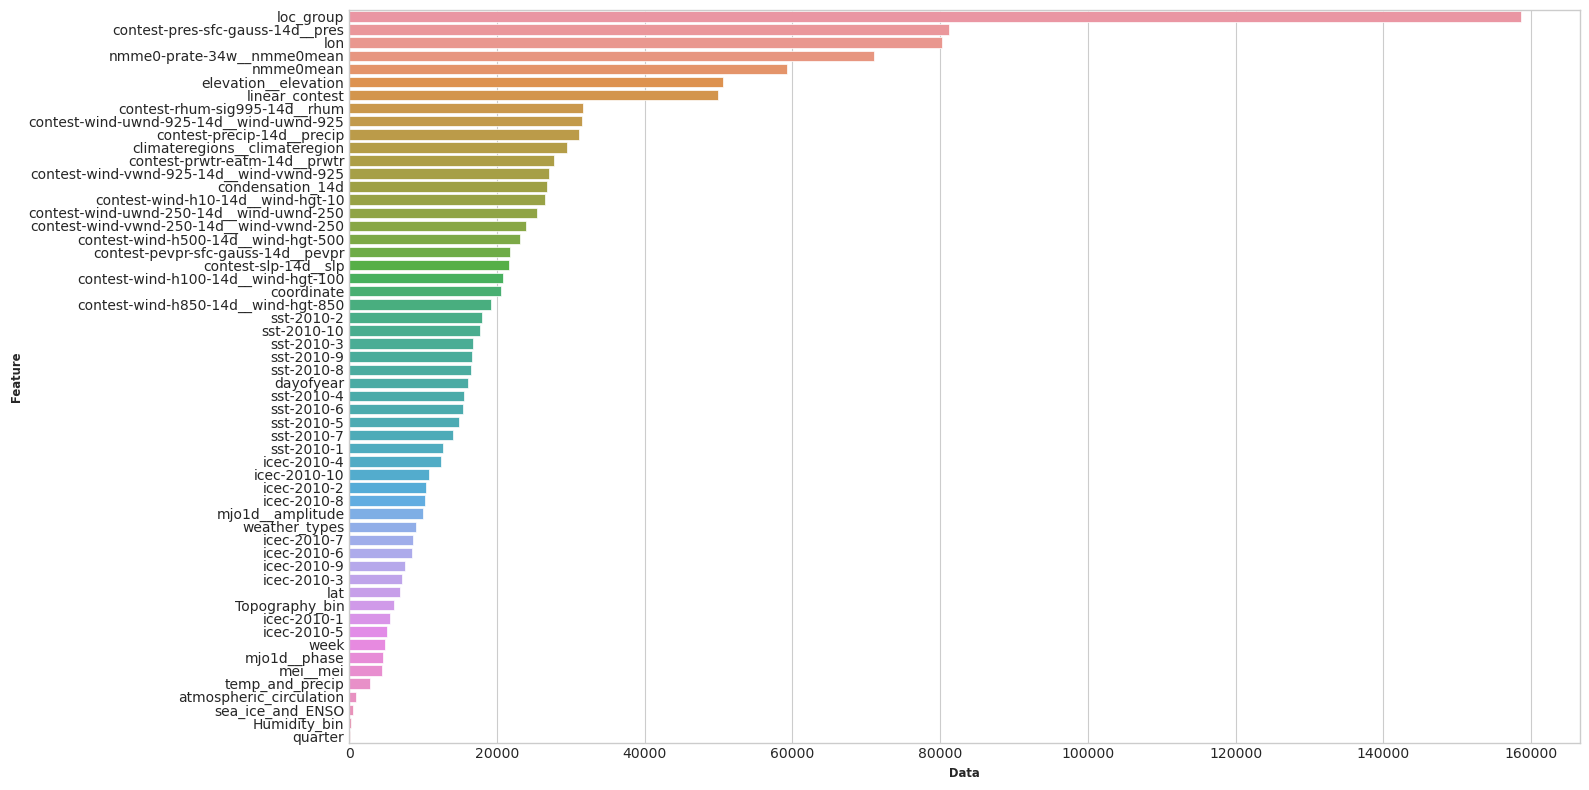

In [121]:
plt.figure(figsize = (16, 8))
sns.barplot(te, x = "Data", y = "Feature")

In [ ]:
plt.figure(figsize = (16, 8))
sns.barplot(te, x = "Data", y = "Feature")

# Submission

In [106]:
y_pred_gbm = gbm.predict(df_test[X.columns])
display(y_pred_gbm)

array([29.4460813 , 29.51489263, 29.51639878, ...,  5.53842683,
        6.11504448,  6.84059722])

In [122]:
y_pred_gbm = gbm.predict(df_test[X.columns])
display(y_pred_gbm)

array([29.39012865, 29.44233984, 29.4366389 , ...,  5.53617523,
        6.12160011,  6.8149471 ])

In [124]:
cat = pd.read_csv("/kaggle/input/linear/submission (33).csv")
y_pred_cat = cat[target].values
display(y_pred_cat)

array([30.1897192 , 30.33156467, 30.18798972, ..., 10.16472082,
       10.14716586, 10.72993471])

In [131]:
y_new = 0.8 * y_pred_gbm + (1-0.8) * y_pred_cat

In [132]:
display(y_new)

array([29.55004676, 29.6201848 , 29.58690907, ...,  6.46188434,
        6.92671326,  7.59794463])

<AxesSubplot:ylabel='Density'>

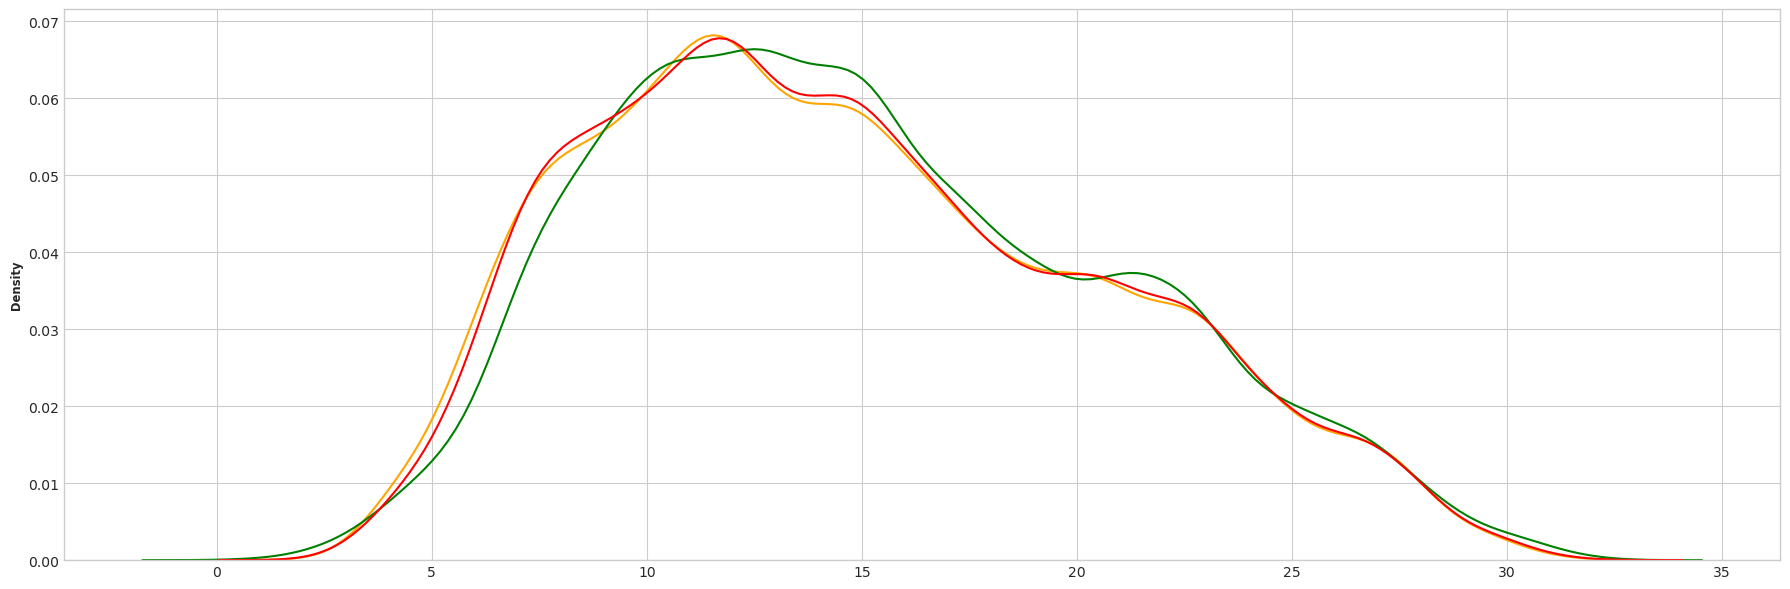

In [139]:
plt.figure(figsize = (18, 6))
sns.kdeplot(y_pred_gbm, label = "LightGBM", color = "orange")
sns.kdeplot(y_pred_cat, color = "green", label = "LinearRegression")
sns.kdeplot(y_new, color = "red", label = "ensemble")

In [133]:
output = pd.DataFrame({'contest-tmp2m-14d__tmp2m': y_new , 'index' : df_test.index})
output.to_csv('/kaggle/working/submission.csv' , index = False)
display("Saved")

'Saved'

# 0.691